# Unsupervised Analysis of Days of Week

Treating bridge crossings each day as features to learn about the relationships between various days.

This notebok is a re-run of the analysis by [Jake Vanderplas](https://github.com/jakevdp/JupyterWorkflow) with an updated data set.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

import pandas as pd

## Getting and formatting data set

In [2]:
from packages.data import get_fremont_data

In [3]:
data = get_fremont_data()
data.head()

,West,East,Total
Date,,,
2012-10-03 00:00:00,4.0,9.0,13.0
2012-10-03 01:00:00,4.0,6.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,2.0,3.0,5.0
2012-10-03 04:00:00,6.0,1.0,7.0


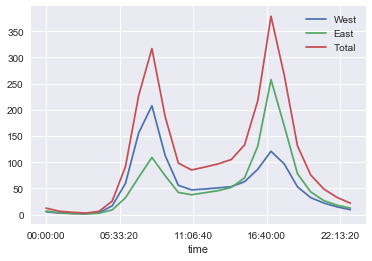

In [4]:
data.groupby(data.index.time).mean().plot()

In [5]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5,:5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


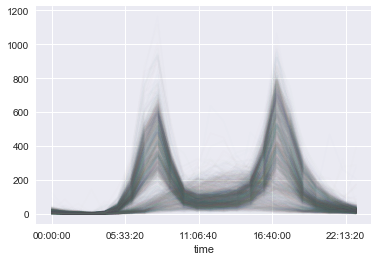

In [6]:
pivoted.plot(legend=False, alpha=0.01)

## Principal Component Analysis

In [7]:
from sklearn.decomposition import PCA

In [8]:
X = pivoted.fillna(0).T.values
X.shape

(1885, 24)

In [9]:
X2 = PCA(2, svd_solver='full').fit_transform(X)
X2.shape

(1885, 2)

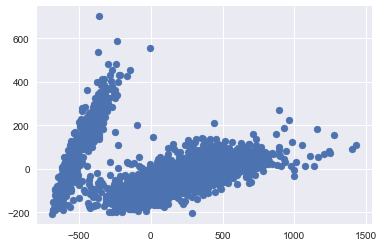

In [10]:
plt.scatter(X2[:,0], X2[:,1])

## Unsupervised Clustering

In [11]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(2)
gmm.fit(X)
labels = gmm.predict(X)
labels

array([1, 1, 1, ..., 1, 1, 1])

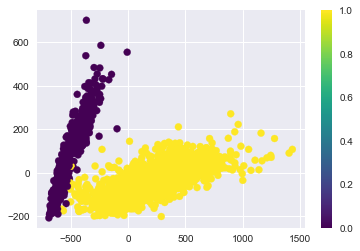

In [12]:
plt.scatter(X2[:,0], X2[:,1], c=labels, cmap='viridis')
plt.colorbar()

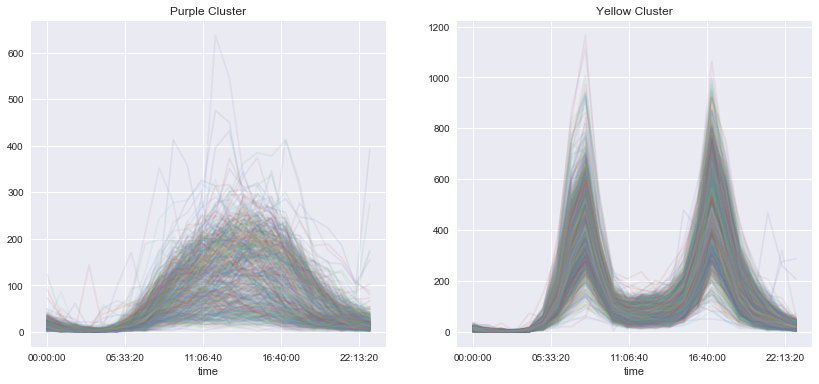

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

pivoted.T[labels == 0].T.plot(legend=False, alpha=0.1, ax=ax[0]);
pivoted.T[labels == 1].T.plot(legend=False, alpha=0.1, ax=ax[1]);

ax[0].set_title('Purple Cluster')
ax[1].set_title('Yellow Cluster');

## Comparing with Day of Week

In [14]:
dayofweek = pd.DatetimeIndex(pivoted.columns).dayofweek

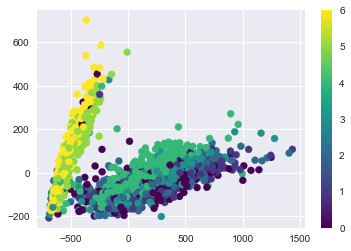

In [15]:
plt.scatter(X2[:, 0], X2[:, 1], c=dayofweek, cmap='viridis')
plt.colorbar();

## Analysing Outliers

The following points are weekdays with weekend pattern. Are they holidays?

In [16]:
dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels == 1) & (dayofweek < 5)]

DatetimeIndex(['2012-10-03', '2012-10-04', '2012-10-05', '2012-10-08',
               '2012-10-09', '2012-10-10', '2012-10-11', '2012-10-12',
               '2012-10-15', '2012-10-16',
               ...
               '2017-11-15', '2017-11-16', '2017-11-17', '2017-11-20',
               '2017-11-21', '2017-11-22', '2017-11-27', '2017-11-28',
               '2017-11-29', '2017-11-30'],
              dtype='datetime64[ns]', length=1301, freq=None)